# Build and Evaluate a classification model

# Importations

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
#sklearn functionnality
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
#Our convenient function
from functions import *

# Define task

##  "Make predictions about county's life expectancy (L/M/H bands) from a set of  metrcs                                          for the countries "

#  Acquire clean data

## Load the data

In [172]:
data=pd.read_csv("world_data.csv")
data.head()

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,11.0,NaN,39.0,NaN,NaN,NaN,73.2,4.80,5800.0,2090.0,33700000
1,Albania,4.606651,11000.0,77.6,97.7,91.4,NaN,6.090,96.8,29.0,2.30,808.0,14.0,1.71,NaN,3190.0,2920000
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,43.1,0.856,97.9,41.4,4.65,2020.0,11.6,2.31,95000.0,3230.0,43400000
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,36.7,7.110,99.6,32.4,1.12,1020.0,14.0,1.66,3600.0,2930.0,2920000
4,Australia,7.309061,43800.0,82.6,100.0,100.0,60.2,1.240,NaN,34.7,1.11,5480.0,3.8,1.86,22000.0,3280.0,23800000


## Inspect data

In [173]:
data.shape

(194, 17)

In [174]:
data.dtypes

country             object
happiness          float64
income             float64
lifeexp            float64
sanitation         float64
water              float64
urbanpopulation    float64
unemployment       float64
literacy           float64
inequality         float64
murder             float64
energy             float64
childmortality     float64
fertility          float64
hiv                float64
foodsupply         float64
population           int64
dtype: object

In [175]:
data.isnull().mean().sort_values()

country            0.000000
water              0.000000
sanitation         0.000000
population         0.000000
income             0.005155
childmortality     0.005155
lifeexp            0.036082
fertility          0.051546
energy             0.128866
foodsupply         0.134021
inequality         0.175258
hiv                0.231959
literacy           0.231959
happiness          0.278351
urbanpopulation    0.386598
unemployment       0.422680
murder             0.520619
dtype: float64

In [176]:
data=data.drop(['murder','urbanpopulation','unemployment'],axis=1)

In [177]:
means=data.mean().to_dict()
for k in means:
    data[k]=data[k].fillna(value=means[k])
data.isnull().mean()

country           0.0
happiness         0.0
income            0.0
lifeexp           0.0
sanitation        0.0
water             0.0
literacy          0.0
inequality        0.0
energy            0.0
childmortality    0.0
fertility         0.0
hiv               0.0
foodsupply        0.0
population        0.0
dtype: float64

In [178]:
data.head()

,country,happiness,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,39.000000,38.579375,2183.725325,73.2,4.80,5800.000000,2090.0,33700000
1,Albania,4.606651,11000.0,77.6,97.7,91.4,96.800000,29.000000,808.000000,14.0,1.71,217991.677852,3190.0,2920000
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,97.900000,41.400000,2020.000000,11.6,2.31,95000.000000,3230.0,43400000
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,99.600000,32.400000,1020.000000,14.0,1.66,3600.000000,2930.0,2920000
4,Australia,7.309061,43800.0,82.6,100.0,100.0,81.573826,34.700000,5480.000000,3.8,1.86,22000.000000,3280.0,23800000


# Understand data

## compute descryption stats

In [179]:
data.describe()

,happiness,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02,194.000000,1.940000e+02
mean,5.395765,17432.849741,71.933690,73.838247,86.329381,81.573826,38.579375,2183.725325,31.441451,2.835924,2.179917e+05,2845.952381,3.787195e+07
std,0.953547,19072.580021,7.466359,29.269367,17.568245,17.055722,7.257464,2618.536430,31.237992,1.336162,5.521169e+05,413.199619,1.419670e+08
min,2.701591,623.000000,49.600000,7.080000,19.300000,25.300000,16.600000,9.580000,2.200000,1.240000,6.000000e+01,1880.000000,1.100000e+04
25%,4.891838,3297.500000,66.425000,49.225000,77.900000,75.575000,34.000000,614.500000,8.200000,1.790000,1.025000e+04,2570.000000,1.982500e+06
50%,5.395765,11050.000000,72.550000,87.900000,94.950000,81.573826,38.579375,1565.000000,17.900000,2.415000,7.000000e+04,2845.952381,8.435000e+06
75%,5.880369,24100.000000,77.400000,97.700000,99.300000,95.375000,42.175000,2425.000000,49.225000,3.687500,2.179917e+05,3140.000000,2.742500e+07
max,7.603434,120000.000000,83.800000,100.000000,100.000000,100.000000,63.000000,18600.000000,137.000000,7.290000,5.600000e+06,3770.000000,1.400000e+09


## Visualization

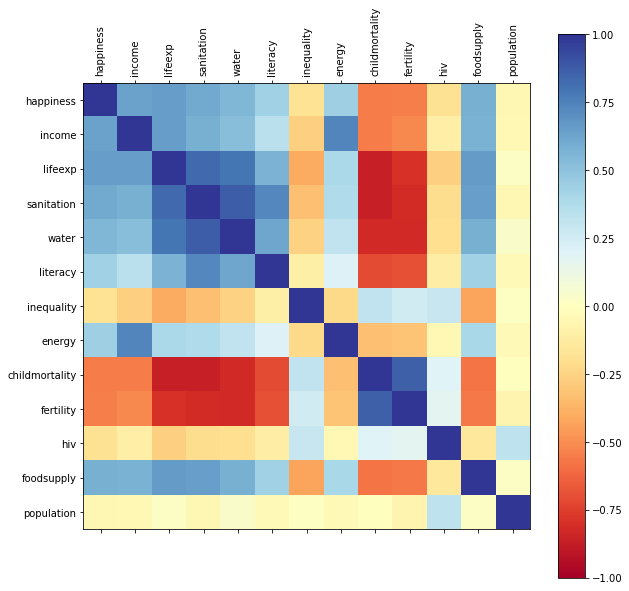

In [180]:
correlationMatrix(data)

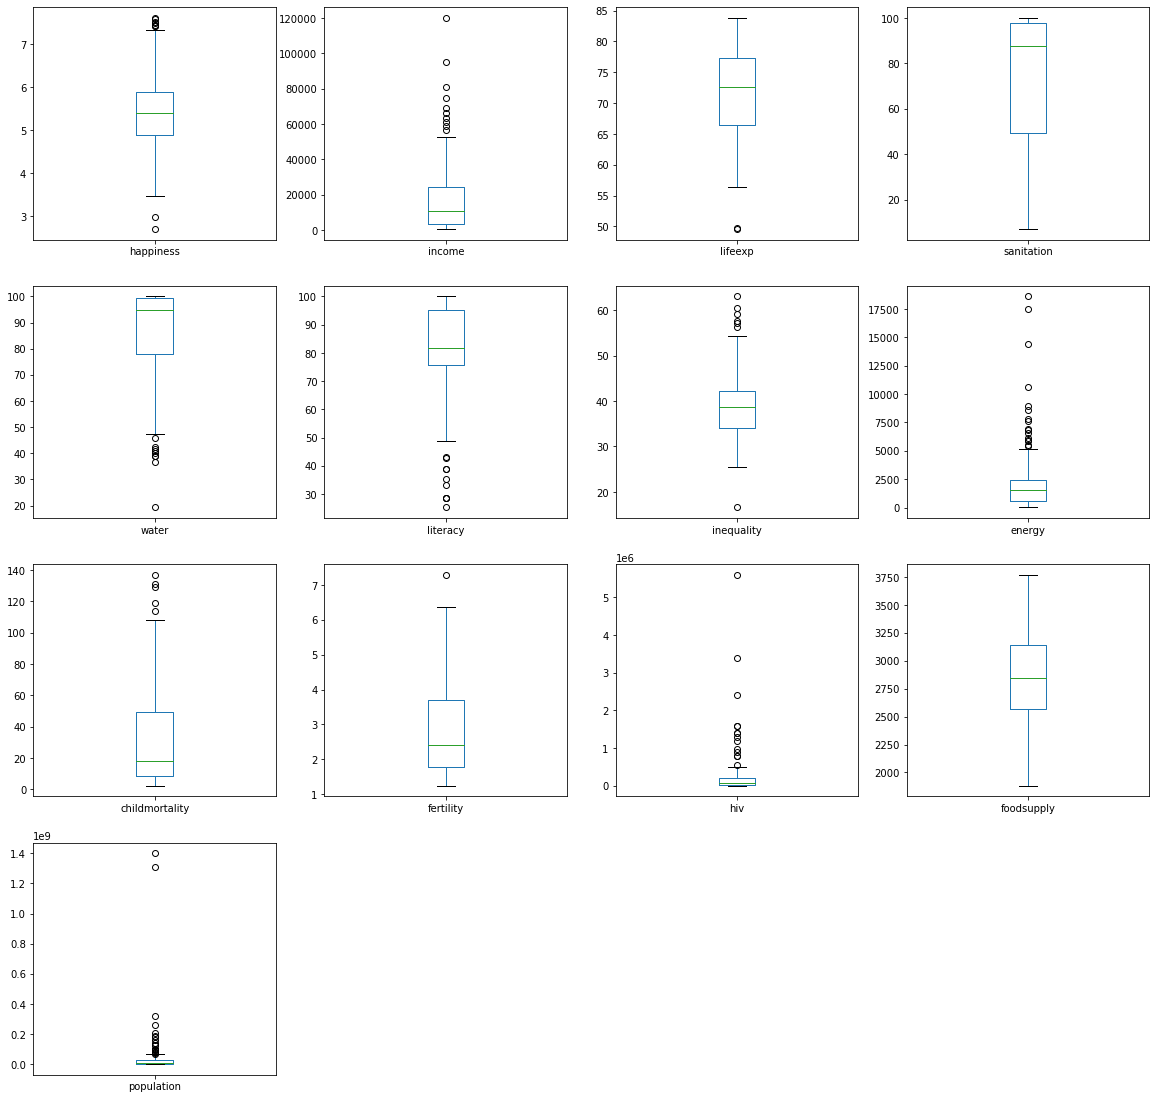

In [181]:
boxPlotAll(data)

# Prepare data

##  Feature Engineering

In [182]:
data=appendEqualCountsClass(data,'lifeexp_band','lifeexp',3,['L','M','H'])
data.lifeexp_band.value_counts()

L    65
H    65
M    64
Name: lifeexp_band, dtype: int64

In [183]:
data.head()

,country,happiness,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population,lifeexp_band
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,39.000000,38.579375,2183.725325,73.2,4.80,5800.000000,2090.0,33700000,L
1,Albania,4.606651,11000.0,77.6,97.7,91.4,96.800000,29.000000,808.000000,14.0,1.71,217991.677852,3190.0,2920000,H
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,97.900000,41.400000,2020.000000,11.6,2.31,95000.000000,3230.0,43400000,H
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,99.600000,32.400000,1020.000000,14.0,1.66,3600.000000,2930.0,2920000,M
4,Australia,7.309061,43800.0,82.6,100.0,100.0,81.573826,34.700000,5480.000000,3.8,1.86,22000.000000,3280.0,23800000,H


## Select features and split into input and target

In [184]:
data.columns

Index(['country', 'happiness', 'income', 'lifeexp', 'sanitation', 'water',
       'literacy', 'inequality', 'energy', 'childmortality', 'fertility',
       'hiv', 'foodsupply', 'population', 'lifeexp_band'],
      dtype='object')

In [185]:
y=data['lifeexp_band']
X=data[['happiness','income','lifeexp','sanitation','water','literacy','inequality','energy','childmortality','fertility','hiv','foodsupply', 'population']]

In [186]:
X.head()

,happiness,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
0,3.982855,1750.0,57.9,39.2,63.0,39.000000,38.579375,2183.725325,73.2,4.80,5800.000000,2090.0,33700000
1,4.606651,11000.0,77.6,97.7,91.4,96.800000,29.000000,808.000000,14.0,1.71,217991.677852,3190.0,2920000
2,6.697131,19100.0,76.5,94.8,99.6,97.900000,41.400000,2020.000000,11.6,2.31,95000.000000,3230.0,43400000
3,4.348320,8180.0,75.4,91.6,98.9,99.600000,32.400000,1020.000000,14.0,1.66,3600.000000,2930.0,2920000
4,7.309061,43800.0,82.6,100.0,100.0,81.573826,34.700000,5480.000000,3.8,1.86,22000.000000,3280.0,23800000


## Scale features

In [187]:
data.describe()

,happiness,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02,194.000000,1.940000e+02
mean,5.395765,17432.849741,71.933690,73.838247,86.329381,81.573826,38.579375,2183.725325,31.441451,2.835924,2.179917e+05,2845.952381,3.787195e+07
std,0.953547,19072.580021,7.466359,29.269367,17.568245,17.055722,7.257464,2618.536430,31.237992,1.336162,5.521169e+05,413.199619,1.419670e+08
min,2.701591,623.000000,49.600000,7.080000,19.300000,25.300000,16.600000,9.580000,2.200000,1.240000,6.000000e+01,1880.000000,1.100000e+04
25%,4.891838,3297.500000,66.425000,49.225000,77.900000,75.575000,34.000000,614.500000,8.200000,1.790000,1.025000e+04,2570.000000,1.982500e+06
50%,5.395765,11050.000000,72.550000,87.900000,94.950000,81.573826,38.579375,1565.000000,17.900000,2.415000,7.000000e+04,2845.952381,8.435000e+06
75%,5.880369,24100.000000,77.400000,97.700000,99.300000,95.375000,42.175000,2425.000000,49.225000,3.687500,2.179917e+05,3140.000000,2.742500e+07
max,7.603434,120000.000000,83.800000,100.000000,100.000000,100.000000,63.000000,18600.000000,137.000000,7.290000,5.600000e+06,3770.000000,1.400000e+09


In [188]:
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(X)
X=pd.DataFrame(rescaledX,columns=X.columns)

In [189]:
X.describe()

,happiness,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.549625,0.140813,0.653032,0.718449,0.830600,0.753331,0.473693,0.116950,0.216925,0.263789,0.038917,0.511086,0.027044
std,0.194528,0.159768,0.218315,0.314995,0.217698,0.228323,0.156411,0.140854,0.231736,0.220853,0.098593,0.218624,0.101406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.446821,0.022404,0.491959,0.453562,0.726146,0.673025,0.375000,0.032539,0.044510,0.090909,0.001820,0.365079,0.001408
50%,0.549625,0.087345,0.671053,0.869780,0.937423,0.753331,0.473693,0.083668,0.116469,0.194215,0.012489,0.511086,0.006017
75%,0.648486,0.196663,0.812865,0.975248,0.991326,0.938086,0.551185,0.129928,0.348850,0.404545,0.038917,0.666667,0.019582
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Build Models

##  Split the input  into train  set and test set

In [190]:
test_size=0.33
seed=1
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size,random_state=seed)
X_test.head()

,happiness,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
44,0.262009,0.027702,0.461988,0.077701,0.724907,0.618474,0.556034,0.017505,0.436202,0.462810,0.041061,0.603175,1.970658e-02
172,0.549625,0.097816,0.653032,0.629789,1.000000,0.753331,0.473693,0.116950,0.247774,0.263789,0.038917,0.511086,2.142874e-07
163,0.549625,0.010446,0.350877,0.352131,0.558860,0.753331,0.439655,0.005617,0.398368,0.404959,0.038917,0.613757,7.214342e-05
35,0.420443,0.079387,0.652047,0.926819,0.980173,0.638554,0.327586,0.043324,0.159496,0.342149,0.001686,0.867725,6.699267e-02
136,0.484455,0.042278,0.722222,0.765390,0.890954,0.911647,0.392241,0.034718,0.146884,0.119008,0.044633,0.460317,6.684981e-02


## Select Algorithme and fit them

In [191]:
#first one
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

#second one
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

## Check models

In [192]:
predictions_dt=model_dt.predict(X_train)
print('With decission tree model:',accuracy_score(predictions_dt,y_train))

predictions_lr=model_lr.predict(X_train)
print('With logistical regression model:',accuracy_score(predictions_lr,y_train))

With decission tree model: 1.0
With logistical regression model: 0.8604651162790697


# Evaluate models

In [193]:
predictions_dt=model_dt.predict(X_test)
print(' Evaluation of decission tree model:',accuracy_score(predictions_dt,y_test))

predictions_lr=model_lr.predict(X_test)
print(' Evaluation of logistical regression model:',accuracy_score(predictions_lr,y_test))

 Evaluation of decission tree model: 0.9846153846153847
 Evaluation of logistical regression model: 0.7538461538461538


In [194]:
model=model_dt

# Iterate

## that part is made in the purpose of Performing the model

## inspect decision tree model 

In [165]:
viewDecisionTree(model_dt,X.columns)
#!conda install python-graphviz

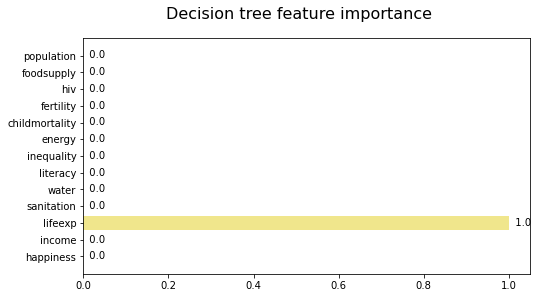

In [166]:
decisionTreeSummary(model_dt,X.columns)

In [167]:
model_lr.classes_

array(['H', 'L', 'M'], dtype=object)

In [169]:
model_lr.coef_

array([[ 1.34205289,  1.24068893,  2.29643458,  0.99977697,  0.56219064,
         0.16334779, -0.19378139,  0.36946793, -0.71154687, -0.50829789,
        -0.04975368,  1.19514338, -0.28940012],
       [-0.93057282, -0.33076381, -1.85613345, -1.65783684, -1.25066974,
        -0.68685429,  0.17297955, -0.14405437,  1.35876087,  1.00015753,
         0.22698912, -0.64287993,  0.12101977],
       [-0.41148007, -0.90992512, -0.44030113,  0.65805987,  0.6884791 ,
         0.5235065 ,  0.02080184, -0.22541356, -0.647214  , -0.49185964,
        -0.17723544, -0.55226345,  0.16838034]])

TypeError: only size-1 arrays can be converted to Python scalars

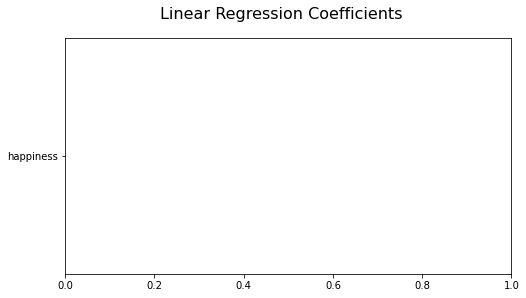

In [170]:
linearRegressionSummary(model_lr,X.columns) 